In [1]:
import pandas 
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.stem.snowball import SnowballStemmer
from pymystem3 import Mystem
import matplotlib.pyplot

path = "C:\\Proganiy\\pp-laba3\\annotation.csv"

In [2]:
def create_ann(annatation: str) -> pandas.DataFrame:

    """Создаёт датафрейм по пути аннатации"""

    frame = pandas.DataFrame(columns =["Оценка","Kоличество слов","Текст рецензии"])
    ann_temp = open(annatation, "r", encoding="utf-8")
    for otzv in ann_temp.readlines():
        mas_otzv = otzv.split(",")
        otzv_temp = open(mas_otzv[0],"r",encoding="utf-8")
        otzv_text = " ".join(otzv_temp)
        row = pandas.Series({"Оценка": int(mas_otzv[2]),"Kоличество слов": len(otzv_text), "Текст рецензии": otzv_text})
        new_row = pandas.DataFrame([row], columns=frame.columns)
        frame = pandas.concat([frame, new_row], ignore_index=True)
    frame.dropna()
    return frame

data = create_ann(path)
print (data)

     Оценка Kоличество слов                                     Текст рецензии
0         1            1853  11 марта этого года переводила 145 в Германию(...
1         1            4278  В пятницу, 22 апреля 2022 г. Сбербанк заблокир...
2         1            2035  Здравствуйте. Перед оформлением досудебной пре...
3         1            3503  Я являюсь клиентом Сбербанка уже более десяти ...
4         1            3340  Призываю предпринимателей подумать дважды, пре...
...     ...             ...                                                ...
2995      5             304  Сегодня хочу рассказать о Сбербанке. В этом пр...
2996      5             863  Банк Сбербанк - это прекрасное финансовое учре...
2997      5             979  Пользуюсь сбербанком сколько себя помню, зарпл...
2998      5            2084  Я не сразу научилась пользоваться кредитной сб...
2999      5             777  Пользуюсь сбербанком давно, никаких нарекании ...

[3000 rows x 3 columns]


In [3]:
def sort_word(frame: pandas.DataFrame) -> pandas.DataFrame:
    
    """Сортирует заданный датафрейм по количеству слов"""

    return frame.sort_values(['Kоличество слов'], ascending = False)


def sort_count_word(frame: pandas.DataFrame, count: int) -> pandas.DataFrame:
    
    """Сортирует заданный датафрейм по количеству слов, меньших или равных заданному значению"""

    return frame.loc[frame['Kоличество слов']<=count]



def sort_star(frame: pandas.DataFrame) -> pandas.DataFrame:
    
    """Сортирует заданный датафрейм по количеству звёзд"""

    return frame.sort_values(['Оценка'], ascending = False)

def info(frame: pandas.DataFrame) -> None:
    
    """Печатает информацию о заданном ДатаФрейме"""

    print(frame.describe())

def sort (frame: pandas.DataFrame, clas: str) -> pandas.DataFrame:

    """Сортирует заданный датафрейм по заднному признаку"""

    return frame.sort_values([clas],ascending = False)

print(sort_count_word(data, 500))

     Оценка Kоличество слов                                     Текст рецензии
25        1             305  В данном брал кредит сначала 500 тысяч рублей,...
32        1             217  Было несколько случаев [цензура] с картами Сбе...
40        1             468  Афигевший (тут должен быть мат), с тупыми мене...
42        1             163  Одобрили кредитную карту и не выпустили, жду у...
43        1             458  Сообщаю о мошеннических действиях. Ноль действ...
...     ...             ...                                                ...
2985      5             279  Пользуюсь приложением больше три года, никогда...
2987      5             336  Не много о Сбербанке. Являюсь клиентом данного...
2990      5             340  Очень удобное приложение банка(сбербанк онлайн...
2994      5             146  Оформлен страховой полис на недвижимость. Уже ...
2995      5             304  Сегодня хочу рассказать о Сбербанке. В этом пр...

[855 rows x 3 columns]


In [4]:
def word_stat (frame: pandas.DataFrame) -> pandas.DataFrame:

    """Группирует заданный датафрейм по оценкам и вычисляет для них минимальное количество, слов максимальное и среднее"""

    frame = frame.drop("Текст рецензии", axis=1)
    temp = frame.groupby("Оценка")
    max_word = temp.max().values.tolist()
    min_word = temp.min().values.tolist()
    mid_word = temp.mean().values.tolist()

    max_word=sum(max_word, [])
    min_word=sum(min_word, [])
    mid_word=sum(mid_word, [])
    
    temp = pandas.DataFrame({"Оценка":["1","2","3","4","5"]})
    temp["max"]=max_word
    temp["min"]=min_word
    temp["mid"]=mid_word
    return(temp)

print(word_stat(data))

  Оценка    max  min          mid
0      1  14990  105  1157.566667
1      2   8398  108  1338.246667
2      3  20464  110  1277.555000
3      4   6447   96   897.191667
4      5   6663  106   901.506667


In [5]:
def create_series (frame: pandas.DataFrame) -> pandas.Series:

    """Создаёт серию из слов дата фрейма по количеству их встречи"""

    strings = to_str(frame)
    strings = delete_marks(strings)
    strings = to_lemm(strings)
    dictionary = to_dict(strings)
    d_series = pandas.Series(dictionary)
    return(d_series)
    
    
def to_str(frame: pandas.DataFrame) -> str:
    
    """Превращает все отзывы из датафрейма в одну строку без заглавных букв"""

    lists = " "
    for i in frame["Текст рецензии"]:
        lists += i + " "
    return(lists.lower())

def delete_marks (strings: str) -> str:
    
    """Удаляет все сивфолы которые входят в punc чтобы оставить только буквы"""

    punc = '''!()-[]{};:'",<>./?@#$%^&*~1234567890'''
    for char in strings:
        if char in punc:
            strings = strings.replace(char, " ")
    return strings

def to_lemm (strings: str) -> str:
    
    """Лемматизирует сводит к начальной форме все слова из строки и превращает снова в строку"""

    temp = Mystem().lemmatize(strings)
    to_s = " ".join(temp)
    return to_s

def to_dict (strings: str) -> dict:
    
    """Ведёт учёт встречаемых слов в заданной строке с учётом стоп-слов и слов связанных с теммой"""

    stop_words = stopwords.words('russian')
    stop_words += ['банк','карта','счёт','сбербанк','перевод','перевести','сбербанк','счет','деньги','это','весь','который','кредит','сбер','банкомат']
    temp = word_tokenize(strings)
    filtred = [word for word in temp if word not in stop_words]
    dictionary = {}
    for word in filtred:
        if word in dictionary:
            dictionary[word] +=1
        else:
            dictionary[word] = 1
    return (dictionary)

ser = create_series(data)
print(ser)

март            45
год           1929
переводить     517
германия         6
денежный       308
              ... 
распродажа       1
увлекаться       1
соблазн          1
умно             1
продтиль         1
Length: 14899, dtype: int64


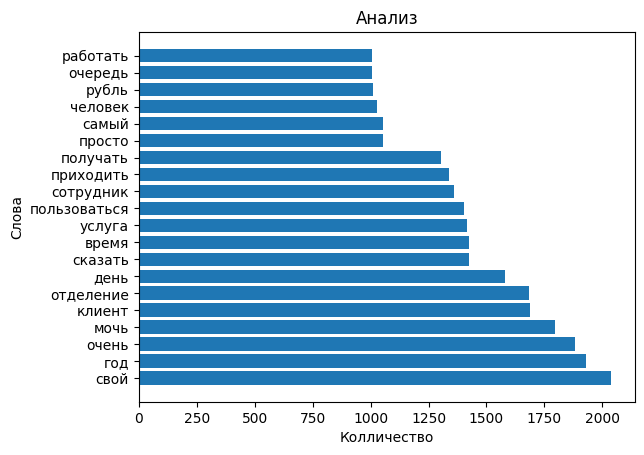

In [7]:
def create_graph(ser: pandas.Series) -> None:
    
    """Отображает топ 20 слов из переданной серии"""

    ser = ser.nlargest(20)
    matplotlib.pyplot.barh(ser.index, ser.values)
    matplotlib.pyplot.xlabel("Колличество")
    matplotlib.pyplot.ylabel("Слова")
    matplotlib.pyplot.title("Анализ")
    matplotlib.pyplot.show()

create_graph(ser)